In [2]:
%pip install matplotlib
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install nbformat
%run PortfolioBase.ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Define the assets
assets = [Bond("Risk Free",5, 1.01)]
for i in range(4):
    assets.append(BinomialStock("Stock "+str(i),4, 2,-1, 0.5))

market = Market(assets)

startingAllocation = np.ones(5)

def exampleTradingStrategy(history):
    #Return a constant uniform allocation 
    return np.ones(5)

examplePortfolio = Portfolio(exampleTradingStrategy, market, startingAllocation)
#Initial value of the portfolio
print(examplePortfolio.returnCurrentValue())
for i in range(50):
    examplePortfolio.stepTime()
#Current market value of the assets
print(examplePortfolio.market.returnAssetValues())
#Current allocation of assets within the portfolio
print(examplePortfolio.currentAllocation)
#Current total value of the portfolio
print(examplePortfolio.returnCurrentValue())

print(examplePortfolio.market.calculateHistoricBeta("Risk Free"))
print(examplePortfolio.market.calculateHistoricBeta("Stock 1"))

betaSum = 0
for i in range(0, 4):
    betaSum += examplePortfolio.market.calculateHistoricBeta(f"Stock {i}")
print(betaSum)

21.0
[8.223159109219415, 14019450, 6805828, 99072980, 49694960]
[1. 1. 1. 1. 1.]
169593226.2231591
1.982112614811289e-08
0.05789425422673129
1.019999980178874


In [10]:
#Variance of end value
examplePortfolio.reset()
finalValues = []
for i in range(50):
    for iterations in range(1000):
        examplePortfolio.stepTime()
    finalValues.append(examplePortfolio.returnCurrentValue())
    examplePortfolio.reset()
print("Value of the portfolio")
print(f"Mean after 1000 steps :{np.mean(finalValues)}")
print(f"Variance after 1000 steps :{np.var(finalValues)}")
print(f"Median after 1000 steps :{np.median(finalValues)}")

Value of the portfolio
Mean after 1000 steps :3.4693082256956156e+158
Variance after 1000 steps :inf
Median after 1000 steps :5.423217459839253e+146


C:\Users\james\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Text(0.5, 1.0, 'A graph to show the evolution of value of a portfolio over 50 realisations with 100 iterations')

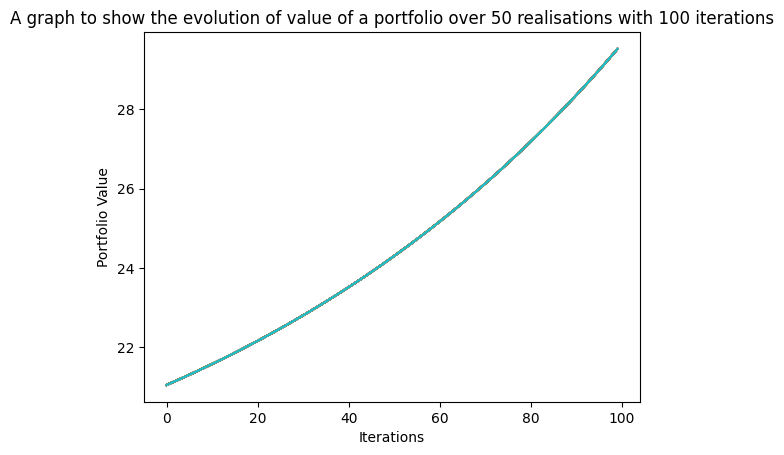

In [11]:
#Trajectory of the portfolio value
import matplotlib.pyplot as plt
examplePortfolio.reset()
values = []

runs = 50
iterationsPerRun = 100

for i in range(runs):
    runValues = []
    for iteration in range(iterationsPerRun):
        examplePortfolio.evolve()
        runValues.append(examplePortfolio.returnCurrentValue())
    values.append(runValues)
    examplePortfolio.reset()

for runValues in values:
    plt.plot(runValues)

plt.xlabel("Iterations")
plt.ylabel("Portfolio Value")
plt.title(f"A graph to show the evolution of value of a portfolio over {runs} realisations with {iterationsPerRun} iterations")

Text(0.5, 1.0, 'A graph to show the evolution of value of a portfolio over 50 realisations with 10 iterations')

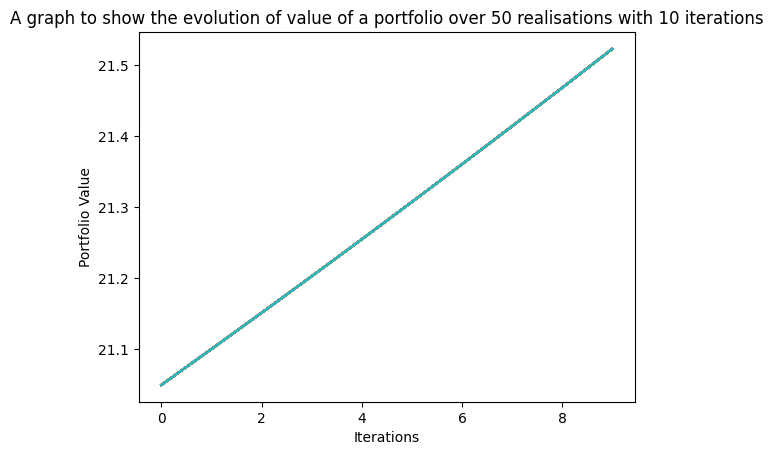

In [8]:
examplePortfolio.reset()
values = []

runs = 50
iterationsPerRun = 10

for i in range(runs):
    runValues = []
    for iteration in range(iterationsPerRun):
        examplePortfolio.evolve()
        runValues.append(examplePortfolio.returnCurrentValue())
    values.append(runValues)
    examplePortfolio.reset()

for runValues in values:
    plt.plot(runValues)

plt.xlabel("Iterations")
plt.ylabel("Portfolio Value")
plt.title(f"A graph to show the evolution of value of a portfolio over {runs} realisations with {iterationsPerRun} iterations")